In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
get_ipython().run_line_magic('matplotlib','inline')
plt.style.use('seaborn-whitegrid')

In [2]:
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url,sep=',')
dfn=df[['traveltime','studytime']]
dfn.head()

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2


In [3]:
x=dfn['traveltime']
y=dfn['studytime']

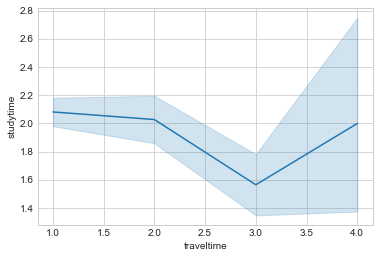

In [4]:
sbs.lineplot(x,y,dashes=True)
plt.show()

In [5]:
from scipy.stats import norm

            traveltime  studytime
traveltime    1.000000  -0.100909
studytime    -0.100909   1.000000


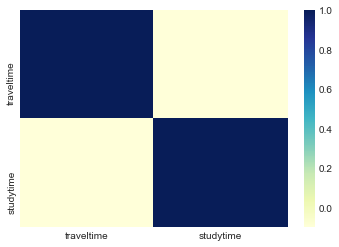

In [6]:
corelation=dfn.corr()
print(corelation)
sbs.heatmap(corelation,cmap="YlGnBu")
plt.show()

            traveltime  studytime
traveltime    0.486513  -0.059070
studytime    -0.059070   0.704324


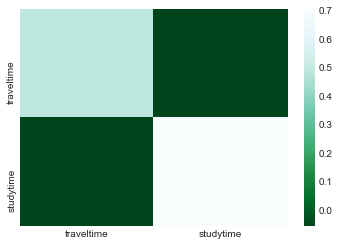

In [7]:
covar=dfn.cov()
print(covar)
sbs.heatmap(covar,cmap='BuGn_r')
plt.show()

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
dfnom=df[['Mjob','Fjob']]
dfnom.head()
dfnom=dfnom.replace('at_home','home')
dfnom=dfnom.astype('category')
dfnom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Mjob    395 non-null    category
 1   Fjob    395 non-null    category
dtypes: category(2)
memory usage: 1.3 KB


In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dfnom['Mjob']=lb.fit_transform(dfnom['Mjob'])
dfnom['Fjob']=lb.fit_transform(dfnom['Fjob'])
dfnom=np.array(dfnom)
dfnom=dfnom[dfnom!=0]

In [11]:
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(dfnom)
print(stat)
print(p)
print(dof)
print(expected.shape)

0.0
1.0
0
(738,)


# NORMALIZATION

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [13]:
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url,sep=',')

In [14]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [15]:
age=np.array(df['age'])
print('MAX AGE',max(age))
print('MIN AGE',min(age))
age=age.reshape(395,1)

MAX AGE 22
MIN AGE 15


In [16]:
from scipy import stats
zscore = np.array(stats.zscore(age))
zscore = zscore[0:394]
zscore = zscore.reshape(2,197)
zscore

array([[ 1.02304645,  0.23837976, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694,  0.23837976, -1.33095364, -1.33095364,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -0.54628694, -0.54628694,  0.23837976, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -0.54628694, -0.54628694,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -0.54628694, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -0.54628694, -1.3

In [17]:
result = []
result.append(age/pow(10,2))
result = np.array(result)
result

array([[[0.18],
        [0.17],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        